<a href="https://colab.research.google.com/github/josho08/cd-my-first-repo/blob/main/GraphOperation/House%26roadsIntegration10_colorchange1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np
import requests

import copy
from PIL import Image
from io import BytesIO
import math
import cv2
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np
import requests

from PIL import Image
from io import BytesIO

from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage import img_as_bool, img_as_ubyte

from skimage.morphology import skeletonize, dilation, square
import imageio

import networkx as nx

import matplotlib.pyplot as plt

In [24]:
def readGitHubUrl(webAddress):
    img_url = webAddress

    # Get the image from the URL
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')

    # Convert the image to grayscale
    bw_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    return bw_image

In [46]:
cells = readGitHubUrl("https://raw.githubusercontent.com/erfanera/SlumImprovment/main/Images/building.png")

In [26]:


cells = 255 - cells
_, paths_mask = cv2.threshold(cells, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to clean up noise and enhance path structures
kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size as needed
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)
ret,thresh = cv2.threshold(cells,100,255,cv2.THRESH_BINARY_INV)


labels= measure.label(thresh, background=0)
bg_label = labels[0,0]
labels[labels==bg_label] = 0 # Assign background label to 0

props = measure.regionprops(labels)
centroids = np.zeros(shape=(len(np.unique(labels)),2)) # Access the coordinates of centroids


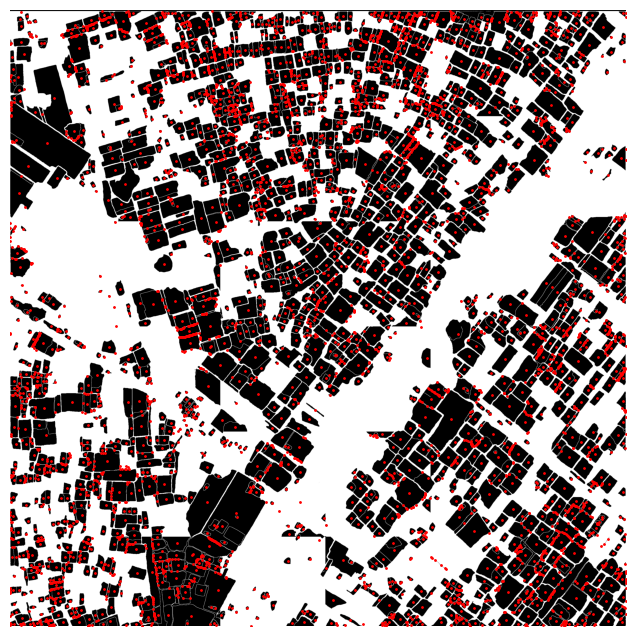

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#plt.figure(figsize=(20, 20))
plt.axis('off')
ax.imshow(cells,cmap='gray')

for i,prop in enumerate(props):
    my_centroid = prop.centroid
    centroids[i,:]= my_centroid
    ax.plot(my_centroid[1],my_centroid[0],'r.',markersize=2)

plt.show()

In [28]:
len(centroids)

4817

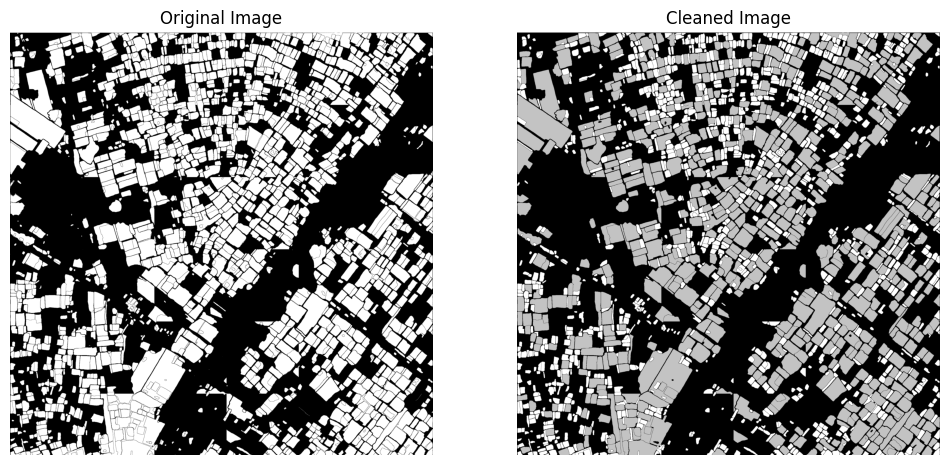

In [29]:

# Read the image and convert to binary

_, paths_mask = cv2.threshold(cells, 127, 255, cv2.THRESH_BINARY_INV)
revert = 255-cells
# Apply morphological operations to clean up noise
kernel = np.ones((5, 5), np.uint8)
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)

# Label the connected components
labels = measure.label(cleaned_paths, background=0)
props = measure.regionprops(labels)

# Create a new image to store the cleaned cells, initially set all to background (0)
cleaned_cells = np.zeros_like(cells)

# Loop through all detected regions
for prop in props:
    if prop.area >= 200:  # Keep regions with area >= 20 pixels
        # Add the region to the cleaned_cells image
        if prop.area >=2000 :
          cleaned_cells[labels == prop.label] = 195
        else:
          cleaned_cells[labels == prop.label] = 255

# Display the original and cleaned images for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(revert, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cleaned_cells, cmap='gray')
ax[1].set_title('Cleaned Image')
ax[1].axis('off')

plt.show()


In [ ]:
height, width = cleaned_paths.shape[:2]
print(height, width)

3000 3000


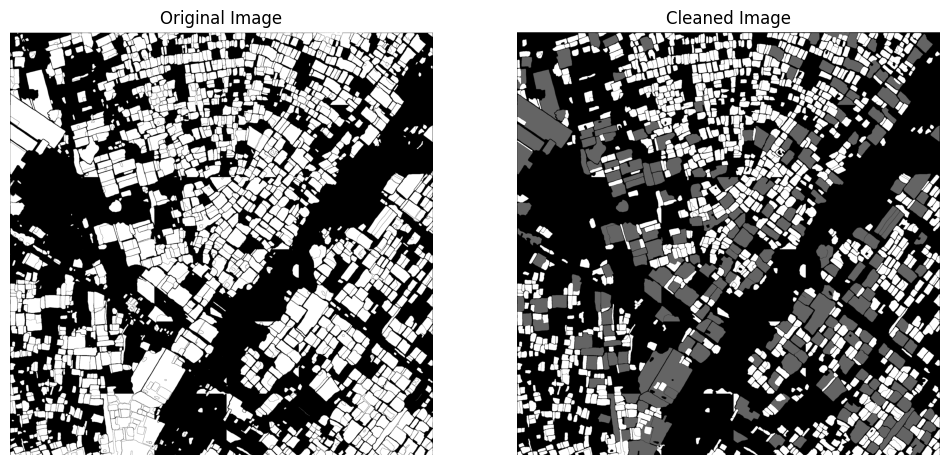

In [ ]:
kernel = np.ones((5, 5), np.uint8)
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)

# Label the connected components
labels = measure.label(cleaned_paths, background=0)
props = measure.regionprops(labels)

# Create a new image to store the cleaned cells, initially set all to background (0)
cleaned_cells = np.zeros_like(cells)
houseCentroid = []
amenityCentroid = []
# Loop through all detected regions
for prop in props:
    if prop.area >= 600:  # Keep regions with area >= 20 pixels
        center = prop.centroid
        # Add the region to the cleaned_cells image
        if prop.area >=4000 :
          cleaned_cells[labels == prop.label] = 100#[255, 255, 0]
          amenityCentroid.append(center)
        else:
          cleaned_cells[labels == prop.label] = 255
          houseCentroid.append(center)
# Display the original and cleaned images for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(revert, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cleaned_cells, cmap='gray')
ax[1].set_title('Cleaned Image')
ax[1].axis('off')

plt.show()

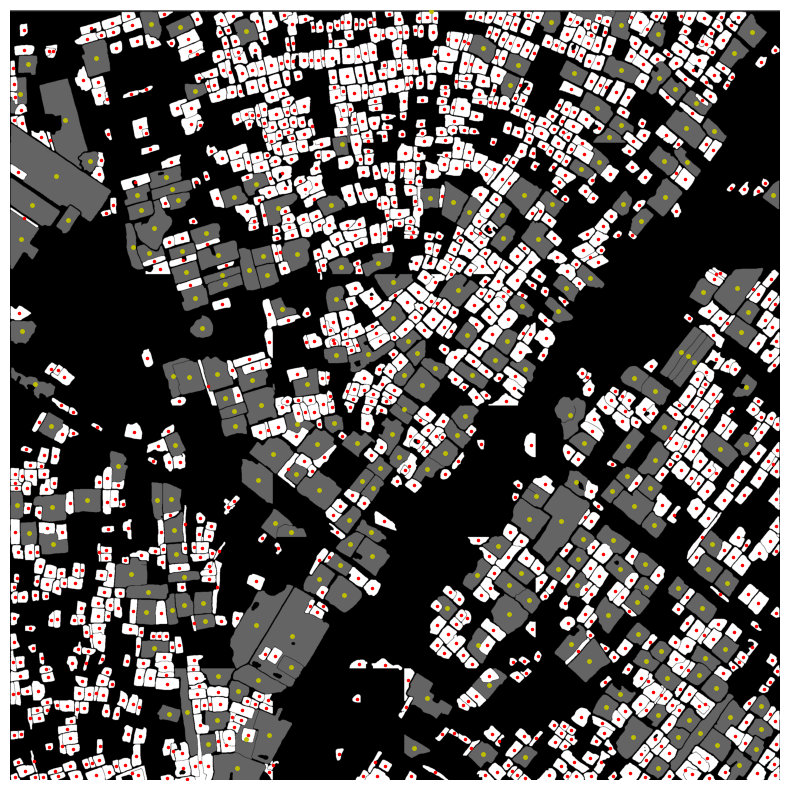

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#plt.figure(figsize=(20, 20))
plt.axis('off')
ax.imshow(cleaned_cells,cmap='gray')

for i in (houseCentroid):
    #my_centroid = prop.centroid
    #centroids[i,:]= my_centroid
    ax.plot(i[1],i[0],'r.',markersize=3)
for i in (amenityCentroid):
    #my_centroid = prop.centroid
    #centroids[i,:]= my_centroid
    ax.plot(i[1],i[0],'y.',markersize=5  )



plt.show()

# Road Detection

###Importing the image

In [30]:

bw_image = readGitHubUrl("https://raw.githubusercontent.com/erfanera/SlumImprovment/main/Images/Shadows_Cleaned.png")


##Morphological Operation

### Morphological Operartion

In [31]:
_, paths_mask = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to clean up noise and enhance path structures
kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size as needed
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)
cleaned_paths = cv2.dilate(cleaned_paths, kernel, iterations=2)  # Increase path width

# Optionally, find contours (which could represent paths)
contours, _ = cv2.findContours(cleaned_paths, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image for visualization
contour_img = cv2.cvtColor(bw_image, cv2.COLOR_GRAY2BGR)  # Convert to BGR to draw colored contours
#cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)  # Draw contours in green



### Show the original and processed images

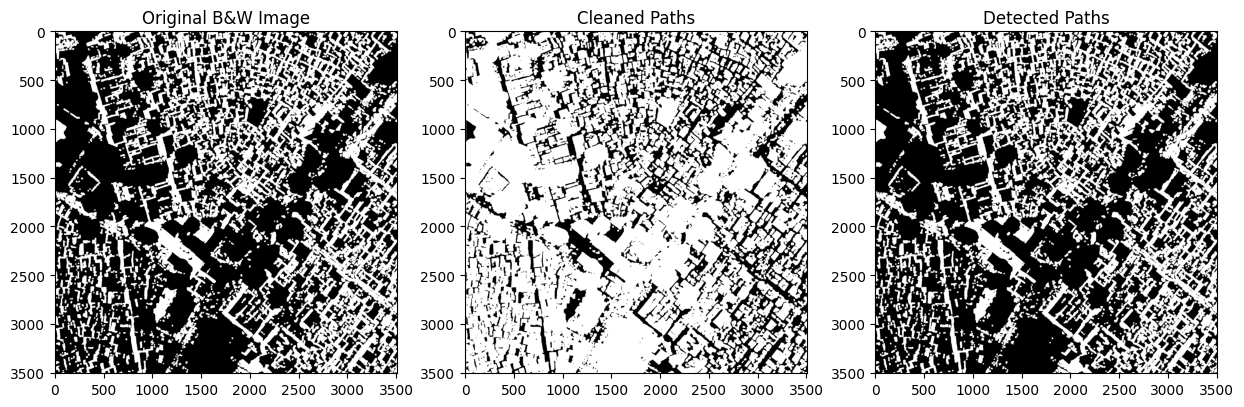

In [32]:

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(bw_image, cmap='gray')
plt.title('Original B&W Image')
plt.subplot(1, 3, 2)
plt.imshow(cleaned_paths, cmap='gray')
plt.title('Cleaned Paths')
plt.subplot(1, 3, 3)
plt.imshow(contour_img)
plt.title('Detected Paths')
plt.show()


##Skeletonization

###Perform Skeletonization

In [33]:
# Invert the horse image
image = invert(cleaned_paths)

# Convert image to binary (0 or 1)
binary_image = img_as_bool(image)

# Perform skeletonization
skeleton = skeletonize(binary_image)

###Visaulization

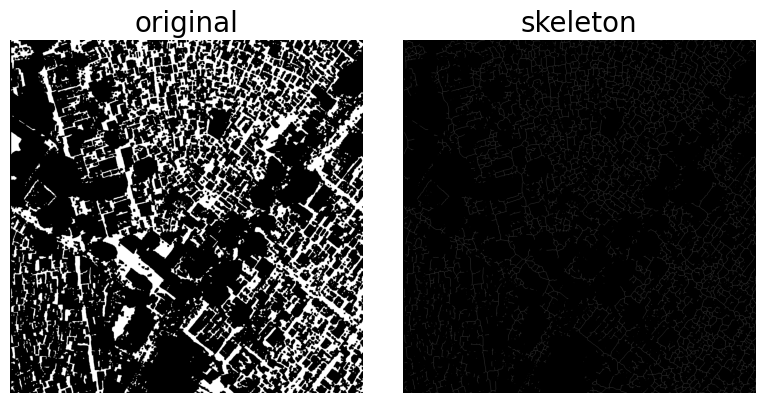

In [34]:
dilation_skeleton = dilation(skeleton, square(1))  # Change square(3) for different thickness
skeleton_uint8 = (skeleton * 255).astype(np.uint8)

# Save the formatted skeleton image
imageio.imsave('skeleton.png', skeleton_uint8)


# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

##Path Detection on skeletonize Image

In [35]:
def skeleton_to_graph2(skeleton):
    # Initialize an empty graph
    G = nx.Graph()

    # Get the dimensions of the skeleton
    rows, cols = skeleton.shape

    # Identify junctions and endpoints
    # Initialize arrays to hold the identified junctions and endpoints
    junctions = set()
    endpoints = set()

    # Define neighbor offsets for connectivity
    neighbors = [(1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1)]

    # Find junctions and endpoints
    for y in range(rows):
        for x in range(cols):
            if skeleton[y, x] == 1:  # If the pixel is part of the skeleton
                neighbor_count = sum(skeleton[y + dy, x + dx] for dx, dy in neighbors if 0 <= x + dx < cols and 0 <= y + dy < rows)
                if neighbor_count > 2:
                    junctions.add((x, y))
                elif neighbor_count == 1:
                    endpoints.add((x, y))

    # Add junctions and endpoints as nodes
    # Add junctions and endpoints as nodes with their positions
    for junction in junctions:
        G.add_node(junction, pos=junction)  # Store the position as an attribute
    for endpoint in endpoints:
        G.add_node(endpoint, pos=endpoint)  # Store the position as an attribute


    # Define a method to trace a line from an endpoint or junction to another node
    def trace_line(start, end=None):
        x, y = start
        line = [start]
        while True:
            for dx, dy in neighbors:
                nx, ny = x + dx, y + dy
                if (nx, ny) != end and (nx, ny) in line:
                    continue  # Avoid looping back on itself
                if 0 <= nx < cols and 0 <= ny < rows and skeleton[ny, nx] == 1:
                    if (nx, ny) in junctions or (nx, ny) in endpoints:
                        # Reached another node; stop tracing
                        return start, (nx, ny), line
                    elif (nx, ny) not in line:  # Continue tracing
                        line.append((nx, ny))
                        x, y = nx, ny
                        break
            else:
                # No more directions to move
                break
        return start, None, line  # In case of isolated segments, though unlikely

    # Trace lines between endpoints and junctions
    visited = set()
    for start in endpoints.union(junctions):
        if start not in visited:
            _, end, line = trace_line(start)
            if end:
                G.add_edge(start, end)
                visited.update(line)

    return G

In [36]:
graph = skeleton_to_graph2(skeleton)


In [37]:
G1 = copy.deepcopy(graph)
pos1 = nx.get_node_attributes(G1, 'pos')

In [47]:
main_image = readGitHubUrl("https://raw.githubusercontent.com/erfanera/SlumImprovment/main/Images/SampleSpliteSatellite.png")

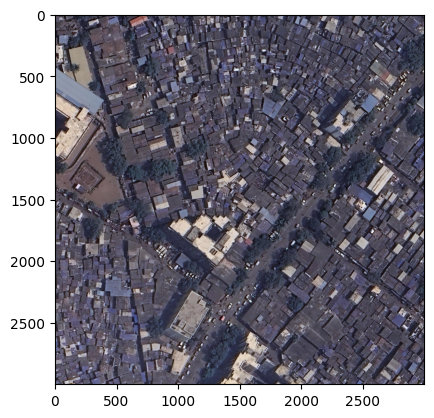

In [48]:
plt.imshow(image)

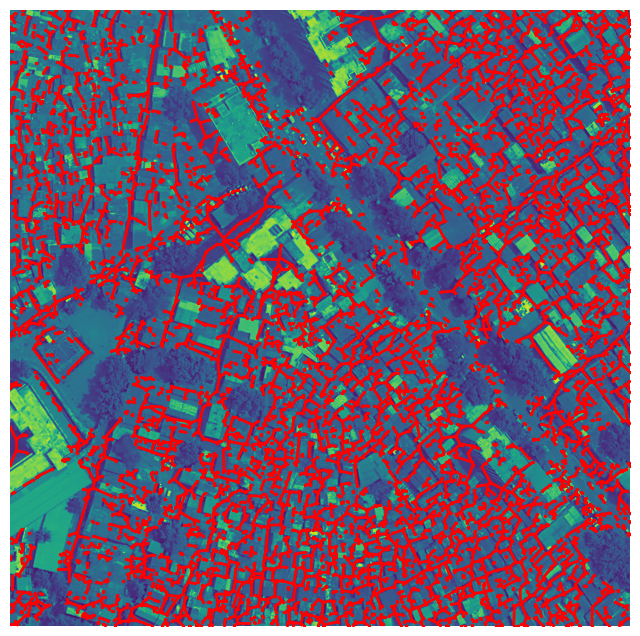

In [51]:

flipped_image = cv2.flip(main_image, 0)
plt.figure(figsize=(8, 8))

ax = plt.gca()
x_values, y_values = zip(*pos1.values())
ax.set_xlim(min(x_values), max(x_values))
ax.set_ylim(min(y_values), max(y_values))
# If you have a background image called 'background.png', uncomment the next line
# main_image = plt.imread('background.png')
ax.imshow(flipped_image,extent=[min(x_values), max(x_values), min(y_values), max(y_values)], aspect='auto')

# Draw the network on top of the image, increase edge width and change edge color
nx.draw(G1, pos1, ax=ax, node_size=2, with_labels=False, width=2, edge_color='r', node_color= 'r')  # Change 'r' to your preferred color

plt.show()

In [52]:
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Function to find the maximum distance between nodes in a cluster
def max_distance_in_cluster(graph, positions):
    max_distance = 0
    for node1 in graph:
        for node2 in graph:
            if node1 != node2:
                distance = euclidean_distance(positions[node1], positions[node2])
                max_distance = max(max_distance, distance)
    return max_distance

In [53]:
distance_threshold = 40  # Example threshold
G2 = copy.deepcopy(graph)
pos2 = nx.get_node_attributes(G2 ,'pos')
# Find all connected components
clusters = list(nx.connected_components(G2))

# Identify and remove clusters below the distance threshold
for cluster in clusters:
    subgraph = G2.subgraph(cluster)
    if max_distance_in_cluster(subgraph, pos2) < distance_threshold:
        # Remove the cluster
        for node in cluster:
            G2.remove_node(node)

# Your graph now has the small clusters removed


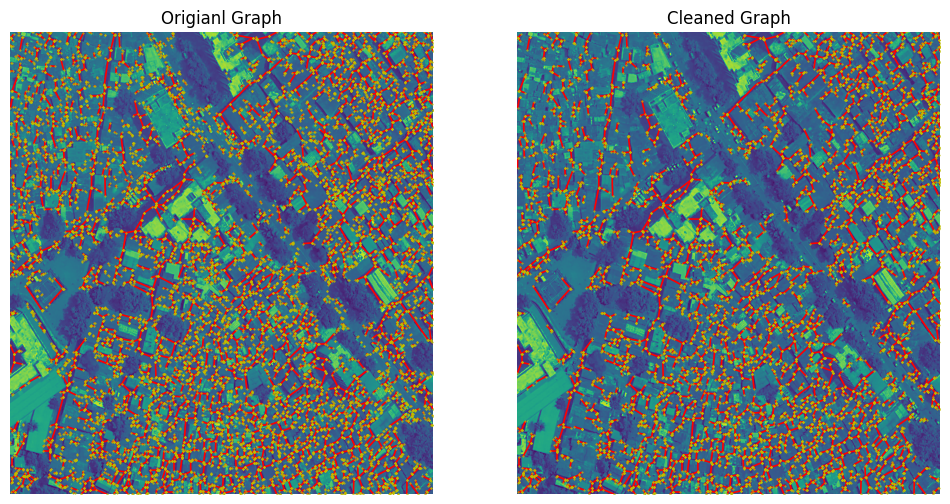

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#ax = plt.gca()
x_values, y_values = zip(*pos1.values())
ax[0].set_xlim(min(x_values), max(x_values))
ax[0].set_ylim(min(y_values), max(y_values))

x_values1, y_values1 = zip(*pos2.values())
ax[1].set_xlim(min(x_values1), max(x_values1))
ax[1].set_ylim(min(y_values1), max(y_values1))


ax[0].imshow(flipped_image, extent=[min(x_values1), max(x_values1), min(y_values1), max(y_values1)], aspect='auto')
ax[1].imshow(flipped_image,extent=[min(x_values), max(x_values), min(y_values), max(y_values)], aspect='auto')

nx.draw(G1, pos1, ax=ax[0], node_size=0.2, with_labels=False, width=1.2, edge_color='r', node_color= 'y')
nx.draw(G2, pos2, ax=ax[1], node_size=0.2, with_labels=False, width=1.2, edge_color='r', node_color= 'y')
ax[1].set_title('Cleaned Graph')
ax[0].set_title('Origianl Graph')
# Draw the network on top of the image, increase edge width and change edge color
  # Change 'r' to your preferred color

plt.show()

In [56]:
data =np.array(houseCentroid)
x_min2, x_max2 = data[:, 0].min(), data[:, 0].max()
y_min2, y_max2 = data[:, 1].min(), data[:, 1].max()

# Print the results
print("Bounds for x: ", x_min2, x_max2)
print("Bounds for y: ", y_min2, y_max2)

height, width = image.shape[:2]
print(height, width)

Bounds for x:  13.56806282722513 2993.8271144278606
Bounds for y:  10.303 2988.6260273972603


AttributeError: shape

"""
Given:

- \( H \) = height of the image
- \( y \) = original y-coordinate of a point

The new y-coordinate after vertical flip, \( y' \), is calculated as:

\[ y' = H - 1 - y \]
"""

In [58]:
height, width = image.shape[:2]
data = np.array(houseCentroid)

# Flip the points vertically based on the image height
data[:, 1] = height - 1 - data[:, 1]

# Convert back to list of tuples if needed
flipped_tuples_list = list(map(tuple, data))

AttributeError: shape

In [57]:
x_values, y_values = zip(*pos1.values())
print(max(x_values), max(y_values))

3506 3506


In [59]:


def connect_new_points_to_graph(graph, new_points):
    """
    Creates a new graph where each new point is connected to the closest node from the original graph.

    :param graph: A NetworkX graph where nodes have a 'pos' attribute containing their coordinates.
    :param new_points: A list of tuples, where each tuple represents the coordinates of a new point.
    :return: A new NetworkX graph with only the new points and their closest existing nodes.
    """
    # Create a new graph to store results
    new_graph = nx.Graph()

    for point in new_points:
        closest_node = None
        min_distance = float('inf')

        # Calculate the distance of the point to each node in the graph
        for node in graph.nodes():
            node_pos = graph.nodes[node]['pos']
            distance = math.sqrt((node_pos[0] - point[0]) ** 2 + (node_pos[1] - point[1]) ** 2)

            # Update the closest node if this node is closer
            if distance < min_distance:
                closest_node = node
                min_distance = distance

        # Connect the point to the closest node in the new graph
        if closest_node is not None:
            new_graph.add_node(closest_node, pos=graph.nodes[closest_node]['pos'])  # Add the closest node
            new_graph.add_node(point, pos=point)  # Add the new point
            new_graph.add_edge(closest_node, point, weight=min_distance)  # Add an edge between them

    return new_graph


In [60]:


x_values2, y_values2 = zip(*pos2.values())
def remapTouple(toupeList):
  # Convert list of tuples into a NumPy array
  data = np.array(toupeList)

  # Old min and max
  old_x_min, old_x_max = data[:, 0].min(), data[:, 0].max()
  old_y_min, old_y_max = data[:, 1].min(), data[:, 1].max()

  # New min and max for mapping
  new_x_min, new_x_max = min(x_values2), max(x_values2)  # Change these to your desired range for x
  new_y_min, new_y_max = min(y_values2), max(y_values2)# Change these to your desired range for y

  # Apply linear transformation to map points to the new range
  data[:, 0] = (data[:, 0] - old_x_min) / (old_x_max - old_x_min) * (new_x_max - new_x_min) + new_x_min
  data[:, 1] = (data[:, 1] - old_y_min) / (old_y_max - old_y_min) * (new_y_max - new_y_min) + new_y_min

  # Convert back to list of tuples if needed
  mapped_tuples_list = list(map(tuple, data))
  return mapped_tuples_list
# Print the results
MappedhouseCentroid = remapTouple(houseCentroid)
MappedamenityCentroid = remapTouple(amenityCentroid)
print("Mapped points:", MappedhouseCentroid)


Mapped points: [(15.468717891801452, 694.7292718132683), (15.703617604072523, 1725.9483849879732), (26.950853254481416, 2142.5529959060254), (13.0, 2300.7798352172977), (35.63942390845817, 845.5847645317615), (25.100771634453555, 1009.3801849986995), (46.695476316962356, 1178.6422609210963), (20.859315485757364, 1245.9691337459114), (37.699075305873116, 1658.7331753938274), (37.23693068423438, 1769.1333442200241), (30.752728189216565, 1897.7951079061202), (31.25729209803136, 1937.6878979130959), (22.89145354535561, 2096.5703360028206), (30.036218991470577, 2187.859671038875), (33.995667849069164, 2234.7060914622148), (19.97883149607512, 2362.346416873645), (26.97304130491289, 2405.8399171331866), (29.696108967813238, 2837.626615591115), (52.693147160362564, 2875.6061874118864), (22.800351212143504, 2951.54171786797), (29.82387366600946, 2988.0641353019023), (21.931542174647042, 3063.3644933771493), (32.9619843310865, 3103.5686506228567), (34.529013336055314, 3171.3808892813454), (27.26

In [61]:


# Convert list of tuples into a NumPy array
Swapped_MappedhouseCentroid = [(y, x) for x, y in MappedhouseCentroid]
Swapped_MappedamenityCentroid = [(y, x) for x, y in MappedamenityCentroid ]

graph_walk = connect_new_points_to_graph(G2, Swapped_MappedhouseCentroid)
pos3 = nx.get_node_attributes(graph_walk ,'pos')

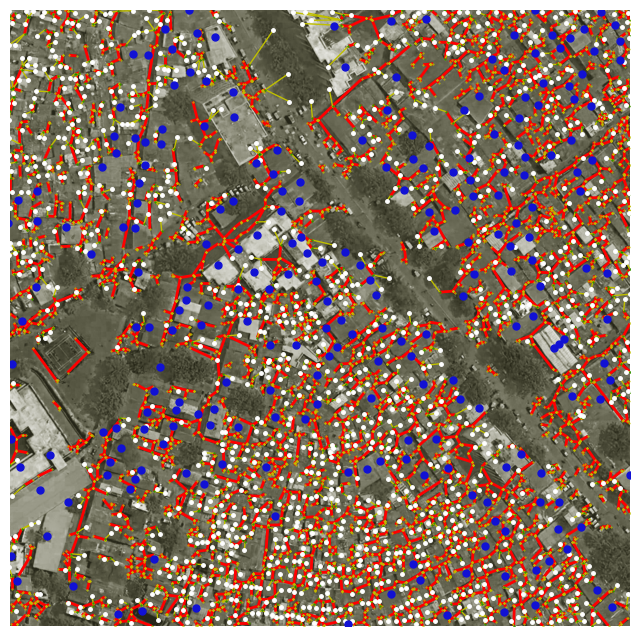

In [62]:
from urllib.request import urlopen
import io
url = "https://raw.githubusercontent.com/erfanera/SlumImprovment/5e6ec53cac195f093ddc7cb1342eb69a60e1bfaa/Images/road%20path%20graph'2.png"  # Replace this with your GitHub link
image_file = urlopen(url)
image = Image.open(io.BytesIO(image_file.read()))

plt.figure(figsize=(8, 8))

ax = plt.gca()

ax.set_xlim(min(x_values2), max(x_values2))
ax.set_ylim(min(y_values2), max(y_values2))
# If you have a background image called 'background.png', uncomment the next line
# main_image = plt.imread('background.png')
ax.imshow(image,extent=[min(x_values2), max(x_values2), min(y_values2), max(y_values2)], aspect='auto')

# Draw the network on top of the image, increase edge width and change edge color
nx.draw(G2, pos2, ax=ax, node_size=0.2, with_labels=False, width=2, edge_color='r', node_color= 'y')
nx.draw(graph_walk, pos3, ax=ax, node_size=0.2, with_labels=False, width=1, edge_color='y', node_color= 'g')
ax.plot(1200,1200,markersize =299)
for i in (MappedhouseCentroid):

    ax.plot(i[1],i[0],'w.',markersize=5  )
for i in (MappedamenityCentroid):

    ax.plot(i[1],i[0],'.',markersize=10 , color =  "#1111d4")
plt.show()

In [63]:
def connect_new_points_to_graph2(graph, houses, amenities):

    # Create a new graph to store results
    new_graph = copy.deepcopy(graph)

    for point in houses:
        closest_node = None
        min_distance = float('inf')
        new_graph.add_node(point, function="house", pos = point)# Calculate the distance of the point to each node in the graph
        for node in graph.nodes():
            node_pos = graph.nodes[node]['pos']
            distance = math.sqrt((node_pos[0] - point[0]) ** 2 + (node_pos[1] - point[1]) ** 2)

            # Update the closest node if this node is closer
            if distance < min_distance:
                closest_node = node
                min_distance = distance

        # Connect the point to the closest node in the new graph
        if closest_node is not None:

            new_graph.add_node(closest_node, pos=graph.nodes[closest_node]['pos'])  # Add the closest node
            new_graph.add_node(point, pos=point, function = "house")  # Add the new point
            new_graph.add_edge(closest_node, point, weight=min_distance, function = "house")  # Add an edge between them
    for point in amenities:
        closest_node = None
        min_distance = float('inf')
        new_graph.add_node(point, function="amenity", pos = point)# Calculate the distance of the point to each node in the graph
        for node in graph.nodes():
            node_pos = graph.nodes[node]['pos']
            distance = math.sqrt((node_pos[0] - point[0]) ** 2 + (node_pos[1] - point[1]) ** 2)

            # Update the closest node if this node is closer
            if distance < min_distance:
                closest_node = node
                min_distance = distance

        # Connect the point to the closest node in the new graph
        if closest_node is not None:

            new_graph.add_node(closest_node, pos=graph.nodes[closest_node]['pos'])  # Add the closest node
            new_graph.add_node(point, pos=point, function = "amenity")  # Add the new point
            new_graph.add_edge(closest_node, point, weight=min_distance, function = "amenity")  # Add an edge between them


    return new_graph

In [64]:
full_Graph = connect_new_points_to_graph2(G2, Swapped_MappedhouseCentroid, Swapped_MappedamenityCentroid)
pos4 = nx.get_node_attributes(full_Graph ,'pos')

for node, attrs in full_Graph.nodes(data=True):
    if 'function' not in attrs:  # Check if 'function' attribute is missing
        full_Graph.nodes[node]['function'] = 'None'
for u, v, attrs in full_Graph.edges(data=True):
    if 'function' not in attrs:  # Check if 'function' attribute is missing
        full_Graph.edges[u, v]['function'] = 'None'

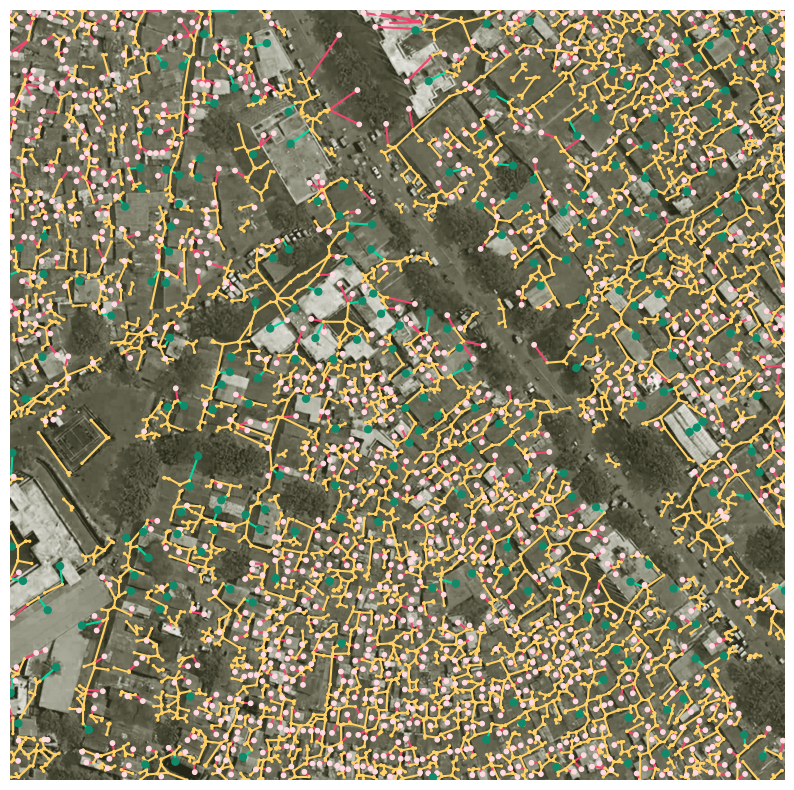

In [65]:
node_colors = {
    'None': '#FFD166',
    'house': '#FFDBE1',
    'amenity': '#118A69'
}

node_size = {
    'None': 2,
    'house':10,
    'amenity': 25
}

edge_colors = {
    'None': '#FFD166',
    'house': '#EF476F',
    'amenity': '#06D6A0'
}
# Get the color for each node and edge based on their 'function' attribute
node_size_map = [node_size[full_Graph.nodes[node].get('function', 'None')] for node in full_Graph.nodes()]
node_color_map = [node_colors[full_Graph.nodes[node].get('function', 'None')] for node in full_Graph.nodes()]
edge_color_map = [edge_colors[full_Graph.edges[edge].get('function', 'None')] for edge in full_Graph.edges()]

fig = plt.figure(figsize=(10,10))
#nx.draw(full_Graph, pos4 ,node_color=node_color_map, edge_color=edge_color_map, with_labels=False)

ax = plt.gca()

ax.set_xlim(min(x_values2), max(x_values2))
ax.set_ylim(min(y_values2), max(y_values2))
# If you have a background image called 'background.png', uncomment the next line
# main_image = plt.imread('background.png')

ax.imshow(image,extent=[min(x_values2), max(x_values2), min(y_values2), max(y_values2)], aspect='auto')
nx.draw(full_Graph, pos4, ax=ax, node_size=node_size_map, with_labels=False, width=1.5, edge_color=edge_color_map, node_color=node_color_map)
plt.show()
fig.savefig('my_figure.png', format='png', dpi=300, bbox_inches='tight')


In [ ]:
import matplotlib.image as mpimg

# Read the background image
background = mpimg.imread('my_figure.png')

In [ ]:
scores = []

$$
C' = \alpha \times RS + \beta \times CS + \delta \times PS - \gamma \times \frac{1}{L + \epsilon}
$$
:
- $RS$ is the Reachability Score, reflecting the overall connectivity between houses and amenities.
- $CS$ is the Coverage Score, indicating the proportion of houses within a walkable distance from any amenity.
- $PS$ is the Proximity Score, representing the average ease of access to amenities.
- $L$ is the total length of all edges in the graph, representing infrastructural costs.
- $\alpha$, $\beta$, $\delta$, $\gamma$ are weighting coefficients that balance the importance of each component within the cost function.
- $\epsilon$ is a small constant (e.g., $1e-5$) added to prevent division by zero and maintain numerical stability.


In [ ]:
def calculate_cost_function(RS, CS, PS, L, alpha, beta, delta, gamma, epsilon=1e-5):

    # Calculate the enhanced cost function
    C_prime = alpha * RS + beta * CS + delta * PS - gamma * (1 / (L + epsilon))
    return C_prime

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
walkable_distance = 400
# Function to add an edge and update the graph plot
def add_edge_and_plot(graph, node1, node2):
    # Add the new edge
    #tempGraph = nx.Graph()
    graph.add_edge(node1, node2)

    # Plot the graph
    pos = nx.get_node_attributes(graph, 'pos')
    plt.figure(figsize=(10,10))


# Remove the border (spines)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)    # Remove top edge
    ax.spines['right'].set_visible(False)  # Remove right edge
    ax.spines['left'].set_visible(False)   # Remove left edge
    ax.spines['bottom'].set_visible(False) # Remove bottom edge
    plt.rcParams['font.family'] = 'Roboto'
    text_x = max(x_values2+(15,0))  # This should be adjusted based on your data to position the text inside the white area
    text_y = max(y_values2)  # Start from the top and adjust as needed
    ax.text(text_x, text_y, 'Sample Evaluation 1000', fontsize=10, ha='left', va='top', color='black', backgroundcolor='white')




    ax.set_xlim(min(x_values2), max(x_values2))
    ax.set_ylim(min(y_values2), max(y_values2))
    #nx.draw(graph, pos, with_labels=True, node_color=[('green' if graph.nodes[n]['function'] == 'house' else 'red' if graph.nodes[n]['function'] == 'amenity' else 'gray') for n in graph.nodes])
    ax.imshow(background,extent=[min(x_values2), max(x_values2), min(y_values2), max(y_values2)], aspect='auto')
    # Highlight the new edge
    nx.draw_networkx_edges(graph, pos, edgelist=[(node1, node2)], edge_color='blue', width=2)


    # Calculate and print the length of the new edge
    x1, y1 = graph.nodes[node1]['pos']
    x2, y2 = graph.nodes[node2]['pos']
    edge_length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    print(f'Length of new edge: {edge_length}')

    # Calculate and print the "reachability score"
    # For simplicity, let's define this as the number of houses that are connected to amenities
    # divided by the total number of houses.
    house_nodes = [n for n in graph.nodes if graph.nodes[n]['function'] == 'house']
    amenity_nodes = set([n for n in graph.nodes if graph.nodes[n]['function'] == 'amenity'])
    connected_houses = 0
    house_to_amenity_distances = {}
    for house in house_nodes:
        shortest_paths = nx.single_source_dijkstra_path_length(graph, source=house, weight='length')
        # Filter out only amenities and find the minimum distance
        amenity_distances = {node: dist for node, dist in shortest_paths.items() if node in amenity_nodes}
        if amenity_distances:
            house_to_amenity_distances[house] = min(amenity_distances.values())
        for path in nx.all_simple_paths(graph, source=house, target=amenity_nodes, cutoff=2): # assuming 'cutoff' as max path length for direct/indirect connection
            if path:
                connected_houses += 1
                break
    if house_to_amenity_distances:
        average_distance = sum(house_to_amenity_distances.values()) / len(house_to_amenity_distances)
        proximity_score = max(0, 1 - (average_distance / walkable_distance))
    else:
        proximity_score = 0  # No houses or no paths to amenities
    reachability_score = connected_houses / len(house_nodes) if house_nodes else 0
    print(f'Reachability Score: {reachability_score}')

    houses_within_walkable_distance = len([dist for dist in house_to_amenity_distances.values() if dist <= walkable_distance])
    coverage_score = houses_within_walkable_distance / len(house_nodes) if house_nodes else 0


    graph.remove_edge(node1, node2)
    cost_function = calculate_cost_function(reachability_score,coverage_score,proximity_score,edge_length, 1, 1, 1, 1)
    ax.text(text_x, text_y-100, 'Cost Function: {x: .4} '.format(x = cost_function), fontsize=6.5, ha='left', va='top', color='black', backgroundcolor='white')
    ax.text(text_x, text_y-200, 'Proximity Score: {x: .4}'.format(x = proximity_score), fontsize=6.5, ha='left', va='top', color='black', backgroundcolor='white')
    ax.text(text_x, text_y-300, 'Coverage Score: {x: .4}'.format(x = coverage_score), fontsize=6.5, ha='left', va='top', color='black', backgroundcolor='white')
    ax.text(text_x, text_y-400, 'Cost Function: {x: .4} '.format(x = cost_function), fontsize=6.5, ha='left', va='top', color='black', backgroundcolor='white')
    ax.text(text_x, text_y-400, 'Length: {x: .0f}'.format(x = edge_length), fontsize=6.5, ha='left', va='top', color='black')
    plt.show()
    return coverage_score, proximity_score, reachability_score, edge_length, cost_function




In [ ]:
all_have_position = all('pos' in full_Graph.nodes[node] for node in full_Graph.nodes)
print(all_have_position)

In [ ]:
nodes_with_one_connection = [node for node, degree in dict(full_Graph.degree()).items() if degree == 1]
import random

In [ ]:
coverage_scores = []
proximity_scores= []
reachability_scores = []
edge_lengths = []
cost_functions = []

In [ ]:
# Find nodes with only one connection
selected_nodes = random.sample(nodes_with_one_connection, 2)
print("Randomly selected nodes with one connection:", selected_nodes)

coverage_score, proximity_score, reachability_score, edge_length, cost_function = add_edge_and_plot(full_Graph, selected_nodes[0], selected_nodes[1])
coverage_scores.append(coverage_score)
proximity_scores.append(proximity_score)
reachability_scores.append(reachability_score)
edge_lengths.append(edge_length)
cost_functions.append(cost_function)
